In [1]:
#!pip install selenium

# Для работы с Yandex wordstat используем Selenium + Chrome

In [3]:
from selenium import webdriver
driver = webdriver.Chrome('./chromedriver.exe')

<ipython-input-3-d9b73e620e19>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


In [322]:
from requests import get

import numpy as np
import pandas as pd
import time
from tqdm.notebook import tqdm

from fake_useragent import UserAgent
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
import matplotlib.pyplot as plt

## Парсер в selenium

In [19]:
# переходим на страницу с подбором слов
driver.get("https://wordstat.yandex.ru/")

In [20]:
# найдем кнопку поиска слов
driver.find_element(By.NAME, "text").click()

In [218]:
# Enter "шуба" text and perform "ENTER" keyboard action
driver.find_element(By.NAME, "text").send_keys("шуба" + Keys.ENTER)

In [25]:
# вводим логин и пароль
driver.find_element(By.ID, "b-domik_popup-username").send_keys("@@@")
driver.find_element(By.ID, "b-domik_popup-password").send_keys("@@@"+ Keys.ENTER)

In [219]:
# тестим запрос
SearchInput = driver.find_element(By.NAME,"text")
SearchInput.send_keys("Honor")

In [220]:
# Поиск
#driver.find_element(By.CLASS_NAME, "b-form-button__input").click()

In [221]:
# очистка формы
SearchInput.clear()

In [62]:
s = driver.find_element(By.CLASS_NAME, "b-history__table-box").text

In [66]:
s = s.replace('Период Абсолютное Относительное\n', '')

In [173]:
# Добавим регулярку
pat = r"\-\s\d{2}.\d{2}.\d{4}\s"
# Достанем таблицу
test = (pd.DataFrame(s.split('\n'),
              columns=['inf']).inf.str.replace(pat,
                '', regex=True).str.split(expand=True))
test = test.rename(columns={0 : 'key'})
test.set_index(['key'], inplace=True)

In [233]:
# Инициализируем данафреймы для Абсолютных значений и Относительных зн.
df_abs = pd.DataFrame(index=test.index)
df_rel = pd.DataFrame(index=test.index)

In [234]:
product = ['хонор', 'айфон', 'шуба']
# Слова запросов покупателей совместно с товаром
# Операторы тут: https://yandex.ru/support/direct/keywords/symbols-and-operators.html
words_to_buy = ['купить']

try:
    
    for i in product:
        try:
            for j in words_to_buy:

                SearchInput = driver.find_element(By.NAME,"text")
                SearchInput.clear()
                SearchInput.send_keys(f"{j} {i}" + Keys.ENTER)
                
                # press ENTER
                #driver.find_element(By.CLASS_NAME, "b-form-button__input").click()

                # Достанем таблицу
                table = driver.find_element(By.CLASS_NAME, "b-history__table-box").text
                
                # Обработаем таблицу
                table = table.replace('Период Абсолютное Относительное\n', '')

                # Добавим регулярку
                pat = r"\-\s\d{2}.\d{2}.\d{4}\s"
                # Достанем таблицу
                tmp_column = (pd.DataFrame(table.split('\n'),
                              columns=['inf']).inf.str.replace(pat,
                                '', regex=True).str.split(expand=True))

                tmp_column = tmp_column.rename(columns={0 : 'key'})
                tmp_column.set_index(['key'], inplace=True)

                # Добавим полученные данные в датафреймы
                df_abs = df_abs.join(tmp_column[1]).rename(columns={1 : f'{i}'})
                df_rel = df_rel.join(tmp_column[2]).rename(columns={2 : f'{i}'})

                # очистка формы
                time.sleep(5)
                #SearchInput.clear()
                
        except:
            print(f'{j} + {i} is not find!!!')
            time.sleep(5)
        
except:
    print('Ups smth wrong!!!')
    time.sleep(5)

преобрести + айфон is not find!!!
преобрести + шуба is not find!!!


In [307]:
df_abs

,хонор,хонор,айфон,шуба
key,,,,
2020-02-01,117315,319,87255,327287
2020-03-01,121535,348,87936,318102
2020-04-01,112260,378,65833,281367
2020-05-01,128549,371,92161,342752
2020-06-01,125957,297,103514,329124
2020-07-01,134961,274,104616,355950
2020-08-01,127276,312,95562,342600
2020-09-01,133372,347,82200,368208
2020-10-01,210658,347,89299,554932


In [308]:
df_abs.index = pd.to_datetime(df_abs.index, dayfirst = True)

In [312]:
df_abs

,хонор,хонор,айфон,шуба
key,,,,
2020-02-01,117315,319,87255,327287
2020-03-01,121535,348,87936,318102
2020-04-01,112260,378,65833,281367
2020-05-01,128549,371,92161,342752
2020-06-01,125957,297,103514,329124
2020-07-01,134961,274,104616,355950
2020-08-01,127276,312,95562,342600
2020-09-01,133372,347,82200,368208
2020-10-01,210658,347,89299,554932


In [317]:
df_abs.dtypes

хонор    object
хонор    object
айфон    object
шуба     object
dtype: object

In [319]:
df_abs = df_abs.astype('int32')

<AxesSubplot:xlabel='key'>

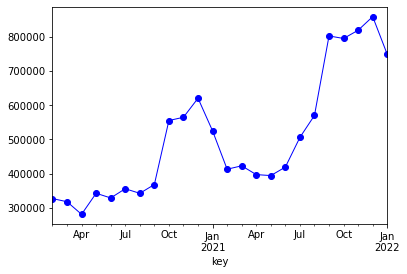

In [321]:
df_abs['шуба'].plot(style='b', linewidth=1.0, marker='o')

# Вывод:
Тест по пробному сбору данных прошел успешно